In [1]:
from base import EnsembleNetwork, 
from operator import itemgetter
import numpy as np
import networks
import progressbar
import time


AI GRIDSEARCH? THOMSPON SAMPLING? HUH?


In [2]:
import dataset_creation
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]
import pprint
pp = pprint.PrettyPrinter(indent=4)

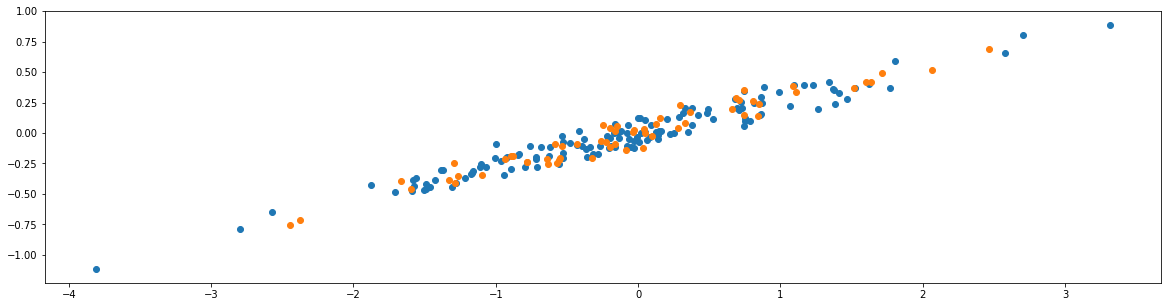

In [3]:
seed = 50
ds = dataset_creation.LinearDataset(seed=50)
X_train,y_train = ds.train_dataset
X_test,y_test = ds.test_dataset
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

In [4]:
from sklearn.grid_search import ParameterGrid

trials = 10

num_neurons = [[2,3,2],[10,10,10],[1,1,1]]
seeds = [50,100,150]
num_layers = len(num_neurons[0])
learning_rates = [0.1,0.01,0.001]
activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             'learning_rate':learning_rates,
             'seed':seeds,
             'l2':[True,False]}
             

grid = ParameterGrid(param_grid)
score_listvanilla = []

#for i in progressbar.progressbar(range(100)):

for params in grid:
    start_time = time.time()
    scores = []
    for i in range(trials):
        net = EnsembleNetwork(**params)
        net.fit(X_train,y_train)
        scores.append(net.score(X_test,y_test))
    score = np.mean(scores)
    var = np.var(scores)
    score_listvanilla.append({'params':params,
                      'score':score,
                      'var':var})
    end_time = time.time()
    print('took {} seconds ({} minutes)'.format(end_time-start_time,(end_time-start_time)/60))
    
score_listvanilla = sorted(score_listvanilla, key=itemgetter('score'), reverse=False)
pp.pprint(score_listvanilla[0])
pp.pprint(score_listvanilla[-1])
#plt.plot(scores)

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


took 36.10267114639282 seconds (0.6017111857732137 minutes)
took 37.040807008743286 seconds (0.6173467834790548 minutes)
took 34.11129403114319 seconds (0.5685215671857198 minutes)
took 33.74622917175293 seconds (0.5624371528625488 minutes)
took 39.90951609611511 seconds (0.6651586016019185 minutes)
took 41.457125186920166 seconds (0.6909520864486695 minutes)
took 33.993139028549194 seconds (0.5665523171424866 minutes)
took 34.080058097839355 seconds (0.5680009682973226 minutes)
took 34.69913697242737 seconds (0.5783189495404562 minutes)
took 34.09720301628113 seconds (0.5682867169380188 minutes)
took 34.43063497543335 seconds (0.5738439162572225 minutes)
took 34.37523627281189 seconds (0.5729206045468648 minutes)
took 33.86175322532654 seconds (0.5643625537554423 minutes)
took 33.77628970146179 seconds (0.5629381616910298 minutes)
took 33.889472007751465 seconds (0.5648245334625244 minutes)
took 34.01689600944519 seconds (0.5669482668240865 minutes)
took 34.156733989715576 seconds (0.

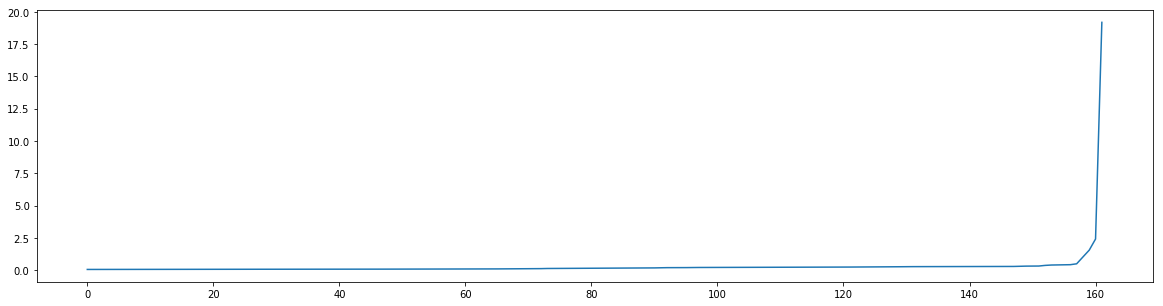

In [13]:
scores = [x['score'] for x in score_listvanilla]
plt.plot(scores)

In [ ]:
len(grid)

In [5]:
from sklearn.grid_search import ParameterGrid




grid = ParameterGrid(param_grid)
score_listdropout = []
for params in grid:
    scores = []
    for i in range(trials):
        net = networks.DropoutNetwork(**params)
        net.fit(X_train,y_train)
        scores.append(net.score(X_test,y_test))
    score = np.mean(scores)
    var = np.var(scores)
    score_listdropout.append({'params':params,
                      'score':score,
                      'var':var})
    
score_listdropout = sorted(score_listdropout, key=itemgetter('score'), reverse=False)
pp.pprint(score_listdropout[0])
pp.pprint(score_listdropout[-1])


{   'params': {   'activations': [   <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.001,
                  'num_neurons': [10, 10, 10],
                  'seed': 100},
    'score': 0.0882077880301202,
    'var': 2.441656843781423e-05}
{   'params': {   'activations': [   <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>,
                                     <function leaky_relu at 0x11fcedd08>],
                  'initialisation_scheme': <function xavier_initializer at 0x1a25821400>,
                  'learning_rate': 0.1,
                  'num_neurons': [10, 10, 10],
                  'seed': 50},
    'score': 22.251102888729683,
    'var': 2736.2107487257895

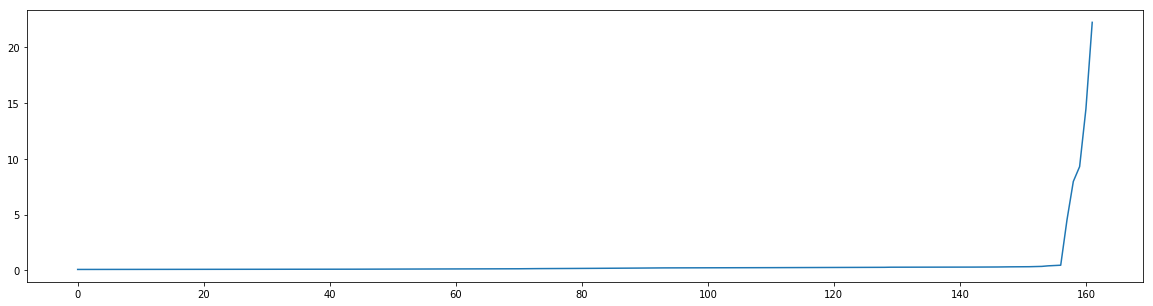

In [12]:
scores = [x['score'] for x in score_listdropout]
plt.plot(scores)

In [15]:
import ensembles
import importlib
importlib.reload(ensembles)

<module 'ensembles' from '/Users/thomas/Documents/Master-Thesis/new_version/ensembles.py'>

In [16]:
from sklearn.grid_search import ParameterGrid


grid = ParameterGrid(param_grid)
score_list_boot = []
for params in grid:
    scores = []
    for i in range(trials):
        net = ensembles.BootstrapEnsemble(**params)
        net.fit(X_train,y_train)
        scores.append(net.score(X_test,y_test))
    score = np.mean(scores)
    var = np.var(scores)
    score_list_boot.append({'params':params,
                      'score':score,
                      'var':var})
    
score_list_boot = sorted(score_list, key=itemgetter('score'), reverse=False)
pp.pprint(score_list_boot[0])
pp.pprint(score_list_boot[-1])
#plt.plot(scores)

KeyboardInterrupt: 

In [43]:
import evaluation
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

experiment started at 2018-08-09 21:44:13.799380
took 47.62192702293396 seconds (0.793698783715566 minutes) to do 9 out of 162. Overall, estimated time is: 728.6154834508895 minutes
took 60.17607808113098 seconds (1.0029346346855164 minutes) to do 9 out of 162. Overall, estimated time is: 824.6547390460968 minutes
took 52.721914768218994 seconds (0.8786985794703166 minutes) to do 9 out of 162. Overall, estimated time is: 818.651591348648 minutes
took 47.7198121547699 seconds (0.7953302025794983 minutes) to do 9 out of 162. Overall, estimated time is: 796.5169750034809 minutes
took 47.531845808029175 seconds (0.7921974301338196 minutes) to do 9 out of 162. Overall, estimated time is: 782.661028175354 minutes
took 46.900392055511475 seconds (0.7816732009251912 minutes) to do 9 out of 162. Overall, estimated time is: 771.8135232210159 minutes
took 46.74620580673218 seconds (0.779103430112203 minutes) to do 9 out of 162. Overall, estimated time is: 763.7282983098711 minutes
took 58.2859358

TypeError: Object of type 'function' is not JSON serializable

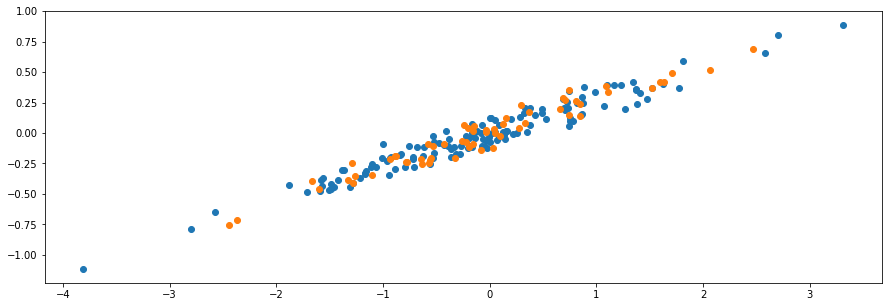

In [44]:
score_list = evaluation.gridsearch(EnsembleNetwork,dataset_creation.LinearDataset)

In [31]:
a = EnsembleNetwork()

In [36]:
type(a)

base.EnsembleNetwork

In [70]:
import ensembles
importlib.reload(ensembles)
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [78]:
trials = 1

num_neurons = [[1,1]]#[[2,3,2],[10,10,10],[1,1,1]]
seeds = [1]#[50,100,150]
num_layers = len(num_neurons[0])
learning_rates = [0.1]#[0.1,0.01,0.001]
l2 = [True]#,False]
activation_schemes = [tf.nn.tanh]#,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal]#, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activation_schemes':activation_schemes,
             'initialisation_schemes':initialisation_schemes,
             'learning_rates':learning_rates,
             'seeds':seeds,
             'l2':l2}
             

In [ ]:
score_list = evaluation.gridsearch(ensembles.BootstrapThroughTimeBobStrap,dataset_creation.LinearDataset,**param_grid)

1
experiment started at 2018-08-10 12:34:34.684647
doing a burn in of 3 epochs
doing a burn in of 3 epochs
